# Exploratory analysis of the data

## Understanding the training data set

Before we conduct cleaning and any meaningful exploratory analysis of the data, we first need to understand the structure of the data set.

In [1]:
# Loading the necessary module
import pandas as pd

# Reading the Youtube Spam data
pre_data = pd.read_csv('train.csv')

# Display first 5 rows of the data
print(pre_data.head())

   COMMENT_ID             AUTHOR                     DATE  \
0           1      Brandon Pryor      2014-01-19 00:36:25   
1           2        Chelsea Yun  2015-05-23 07:17:09.691   
2           3  Sofia Aristizabal      2014-09-09 00:43:52   
3           4     said abdesalam  2015-05-24 07:35:13.754   
4           5         crazy girl  2015-05-23 23:26:05.305   

                                             CONTENT  \
0  I dont even watch it anymore i just come here ...   
1                                        i hate rap﻿   
2        I loved, she is amazing.. OMG your eyes*_*﻿   
3                                       song is bad﻿   
4                                       tension⤴︎⤴︎﻿   

                                          VIDEO_NAME  CLASS  
0                     PSY - GANGNAM STYLE(?????) M/V      0  
1          Eminem - Love The Way You Lie ft. Rihanna      0  
2                                  Katy Perry - Roar      0  
3          Eminem - Love The Way You Lie ft. Rih

In [2]:
# Show the names of the columns
colnam = pre_data.columns

for x in colnam:
    print(f'Colume name: {x}')

Colume name: COMMENT_ID
Colume name: AUTHOR
Colume name: DATE
Colume name: CONTENT
Colume name: VIDEO_NAME
Colume name: CLASS


In [3]:
# Show the dimensions of the data
pre_data.shape

(1369, 6)

From the coding above, we see that:
- The Youtube spam comment data set has a total of 1369 number of rows, and 6 columns.
- The columns are COMMENT_ID, AUTHOR, DATE, CONTENT, VIDEO_NAME, and CLASS.

Specially:
1. COMMENT_ID is simply a tracking variable.
2. AUTHOR means the Youtube name of the comment contributor.
3. DATE means the data of the posted comment. It is in a format of Year-Month-Day + time up to seconds.
4. CONTENT is the comment posted.
5. CLASS calssify whether this comment is a spam or not with 0 or 1.


## Checking for NAs and duplicates in the data

In [4]:
# Count the number of NAs in each columns
print('The number of NAs in the data set categorized by columns are: \n', pre_data.isnull().sum())

The number of NAs in the data set categorized by columns are: 
 COMMENT_ID      0
AUTHOR          0
DATE          170
CONTENT         0
VIDEO_NAME      0
CLASS           0
dtype: int64


In [5]:
# Count the number of duplicated rows
print('The total number of duplicated rows in the data set is:', pre_data.duplicated().sum())

The total number of duplicated rows in the data set is: 0


As we see from the results above, we do not have duplicated values. For any columns besides DATE, there are no NA values. We will discuess whether we will clean the data in detail in the feature selection section.

## Explore the data set

Notice that since COMMENT_ID is only a tracking variable, we will not explore this column.

### Exploring AUTHOR

In [6]:
# Count the number of unique contributors in the data set
pre_data['AUTHOR'].nunique()

1267

In [7]:
# Loading the necessary module
from collections import Counter

# Count the top 5 most dedicated contributors
top_5_author = Counter(pre_data['AUTHOR']).most_common(5)

for x in top_5_author:
    print(f'{x[0]}: {x[1]}')

Louis Bryant: 7
M.E.S: 7
Shadrach Grentz: 6
DanteBTV: 5
Laura Brown: 4


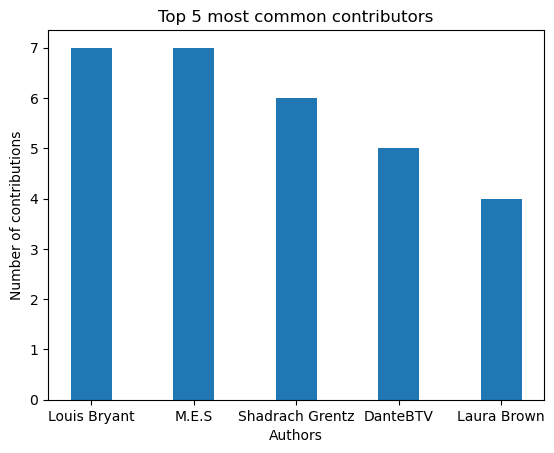

In [8]:
# Loading the necessary module
import matplotlib.pyplot as plt 

# Visualize top 5 most common contributors in the data set
name = [x[0] for x in top_5_author]
count = [x[1] for x in top_5_author]

plt.bar(name, count, width = 0.4)

plt.xlabel('Authors')
plt.ylabel('Number of contributions')
plt.title('Top 5 most common contributors')

plt.show()


There are a total of 1267 unique authors in the data set. And we have top 5 contributors as:
1. Louis Bryant with 7 contributions.
2. M.E.S with 7 contributions.
3. Shadrach Grentz with 6 contributions.
4. DanteBTV with 5 contributions.
5. Laura Brown with 4 contributions.

We can also explore who are the top 5 most common authors to spam comments:

In [9]:
filtered_data = pre_data[pre_data['CLASS'] == 1]

top_5_spammer = Counter(filtered_data['AUTHOR']).most_common(5)

for x in top_5_spammer:
    print(f'{x[0]}: {x[1]}')

Louis Bryant: 7
M.E.S: 7
Shadrach Grentz: 6
DanteBTV: 5
Laura Brown: 4


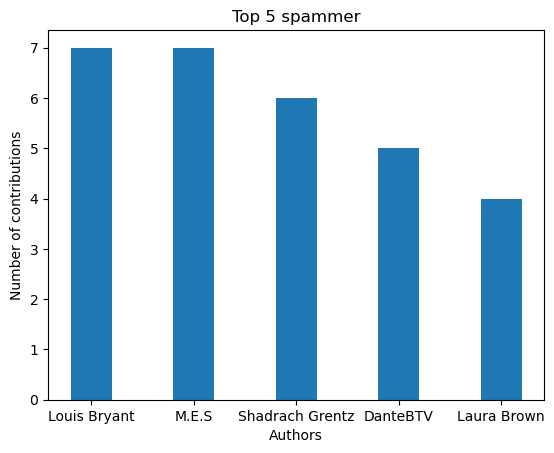

In [10]:
# Visualize top 5 spammers in the data set
name = [x[0] for x in top_5_spammer]
count = [x[1] for x in top_5_spammer]

plt.bar(name, count, width = 0.4)

plt.xlabel('Authors')
plt.ylabel('Number of contributions')
plt.title('Top 5 spammer')

plt.show()

Surprisingly, we see that the top 5 spammers are the same as the top 5 general contributors. This is very interesting.

### Exploring CONTENT with respect to spam comments

Since we are building the model to detect spam comment, we need to investigate the underlying language structure of each comment. 

Intuitively, spam comments can have some commonly used words and punctutations. Spam comments may also disportionally contain URLs and emojis comparing with the non-spam comments.

We will investigate these features.



In [11]:
# Load nessary module
import re

# A function to see if a comment contains URL
def contains_url(comment):
    pattern = r'http[s]?://\S+|www\.\S+'
    return bool(re.search(pattern, comment))

pre_data['Contains_url'] = pre_data['CONTENT'].apply(contains_url)

num_urls = pre_data['Contains_url'].sum()

print(f'The number of comments containing URLs is: {num_urls}')

The number of comments containing URLs is: 137


In [12]:
url_spam = pre_data[(pre_data['CLASS'] == 1) & (pre_data['Contains_url'] == True)]

prop_url_spam = len(url_spam) / num_urls * 100

print(f'The proposition of spam comments containing a URL is: {prop_url_spam}%')

The proposition of spam comments containing a URL is: 94.8905109489051%


We can see that as long as the comment is a spam, it is very likely to contain a URL.

In [13]:
!pip install emoji

In [14]:
# Load necessary module
import emoji

# Function to check if a comment contains emojis
def contains_emoji(comment):
    return bool(emoji.emoji_count(comment))

pre_data['Contains_emo'] = pre_data['CONTENT'].apply(contains_emoji)

num_emo = pre_data['Contains_emo'].sum()

print(f'The number of comments containing emoji is: {num_emo}')

The number of comments containing emoji is: 36


In [15]:
emo_spam = pre_data[(pre_data['CLASS'] == 1) & (pre_data['Contains_emo'] == True)]

prop_emo_spam = len(emo_spam) / num_emo * 100

print(f'The proposition of spam comments containing emoji is: {prop_emo_spam}%')

The proposition of spam comments containing emoji is: 30.555555555555557%


We can see that the not a lot of spam comment contains emoji.

In [16]:
# Extracting the spam comment and non-spam comment
spam_comment = pre_data[pre_data['CLASS'] == 1]['CONTENT']
non_spam_comment = pre_data[pre_data['CLASS'] == 0]['CONTENT']

punctuation_pattern = r'[^\w\s]'

punc_list = []
for comment in spam_comment:
    comment = comment.replace('\ufeff', '') # Removing the Byte Order Mark
    punctuations = re.findall(punctuation_pattern, comment)
    punc_list.extend(punctuations)

punctuation_counts = Counter(punc_list)

top_5_punc = punctuation_counts.most_common(5)

for x in top_5_punc:
    print(f'{x[0]}: {x[1]}')

.: 1421
!: 1323
/: 952
:: 439
;: 399


Notice that we have to remove the BOM becuase it is a issue I observed when I count the punctuations, it is included as a part of a punctuation. It is esstially a marker python uses when encoding the files including csv. This issue often arises when reading the csv file. So, we need to remove it, it does not impact the file anyway.

We can see that the most common punctuations in spam comments is ., !, /, :, ;. And /, :, ; are likely to be the punctuations in the URL.

In [17]:
# Define whether the comment contains top spam punctuations
def contains_punc(comment):
    tokens = comment.lower().split(' ')
    return any(word in top_5_punc for word in tokens)

pre_data['Contains_punc'] = pre_data['CONTENT'].apply(contains_punc)

In [18]:
# loading the necessary modules
import nltk # Natural language toolkit
from nltk.corpus import stopwords # Importing common stopwords
from nltk.tokenize import word_tokenize # Import tokenizer
from nltk.stem import WordNetLemmatizer # Import lemmatizer

# Download necessary module resources
nltk.download('stopwords') # Download stopwords database
nltk.download('punkt') # Download Punkt tokenizer
nltk.download('wordnet') # Enable the WordNetLemmatizer by downloading WordNet database
nltk.download('omw-1.4') # A additional database

[nltk_data] Downloading package stopwords to /opt/conda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /opt/conda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /opt/conda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /opt/conda/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
lemmatizer = WordNetLemmatizer()

# Building the text cleaning function and tokenization
def clean_text(text):
    # Step 1: Remove URLs
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
    
    # Step 2: Remove emojis
    text = emoji.replace_emoji(text, replace="")
    
    # Step 3: Convert to lowercase
    text = text.lower()
    
    # Step 4: Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Step 5: Tokenize
    token = word_tokenize(text)
    
    # Step 6: Remove stopwords
    token = [word for word in token if word not in stopwords.words('english')]
    
    # Step 7: Lemmatize
    token = [lemmatizer.lemmatize(word) for word in token]
    
    return token

In [20]:
# Count top 5 most commonly used words in spam comment
all_tokens = []
for comment in spam_comment:
    token = clean_text(comment)
    for x in token:
        all_tokens.append(x)

top_5_words = Counter(all_tokens).most_common(5)

for x in top_5_words:
    print(f'{x[0]}: {x[1]}')

check: 404
video: 198
please: 159
subscribe: 157
youtube: 137


Here, we can see the 5 most common words used in the spam comments.

In [21]:
# Function to check if a comment contain those top used spam words
def contains_words(comment):
    tokens = clean_text(comment)
    return any(word in tokens for word in top_5_words)

pre_data['Contains_words'] = pre_data['CONTENT'].apply(contains_words)

### Explore VIDEO_NAME colume

In [22]:
# Count the number of unique videos in the data set
pre_data['VIDEO_NAME'].nunique()

5

We can see there are 5 unique videos in the the data set.

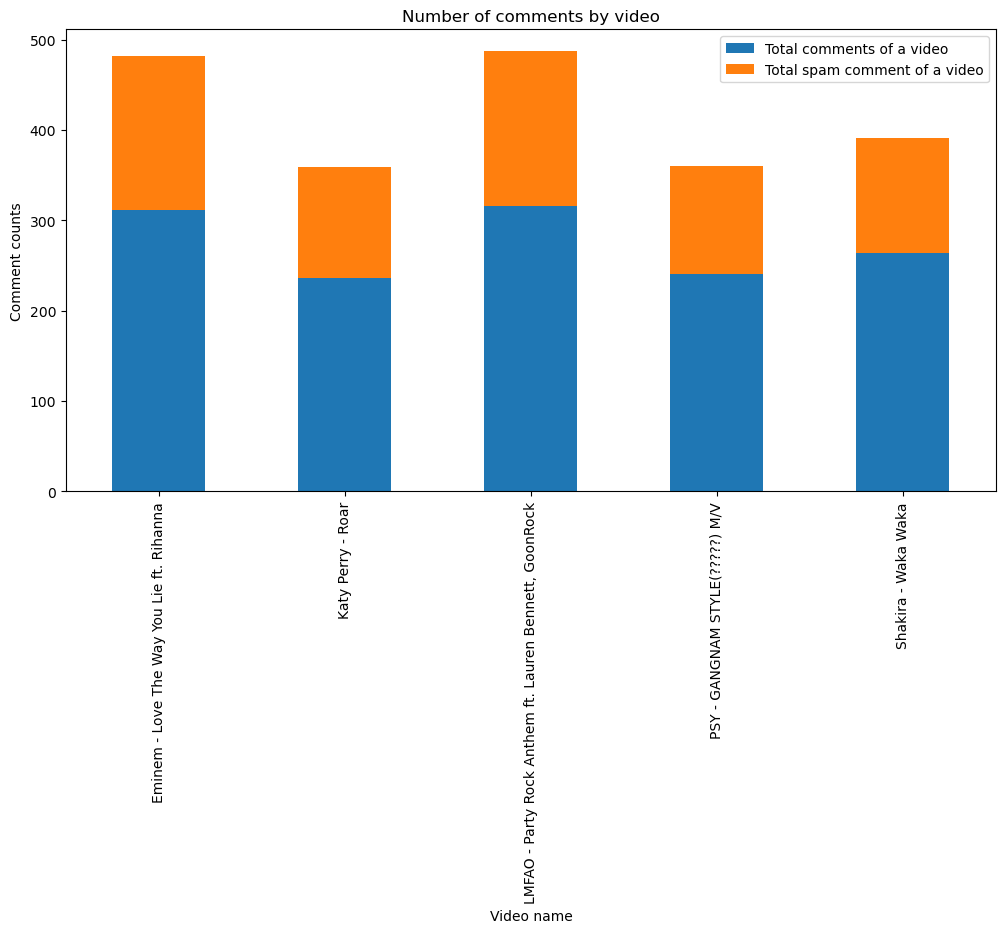

In [23]:
# Visualize the composition of comments of the videos
vid_comment = pre_data['VIDEO_NAME'].value_counts()
spam_vid_comment = filtered_data['VIDEO_NAME'].value_counts()

total_vid_comment = pd.DataFrame({
    'Total comments of a video': vid_comment,
    'Total spam comment of a video': spam_vid_comment
})

total_vid_comment.plot(kind='bar', figsize=(12, 6), stacked=True)

plt.title("Number of comments by video")
plt.xlabel("Video name")
plt.ylabel("Comment counts")
plt.show()

### Explore CLASS colume

In [24]:
num_comment = pre_data.shape[0]

num_spam = len(spam_comment)

prop_spam = len(spam_comment) / pre_data.shape[0] * 100

print(f'The proposition of spam comment is: {prop_spam}%')

The proposition of spam comment is: 51.86267348429511%


we can see that slightly over half of the comments are spam comments.

# Feature selection

## Intuitive feature selection

From the initial data set, we have 6 columes. And in the previous sections, we have created more columns according to the properties of the data set.

In [25]:
# Showing all columes we have in the dataset so far.

colnam = pre_data.columns

for x in colnam:
    print(f'Colume name: {x}')

Colume name: COMMENT_ID
Colume name: AUTHOR
Colume name: DATE
Colume name: CONTENT
Colume name: VIDEO_NAME
Colume name: CLASS
Colume name: Contains_url
Colume name: Contains_emo
Colume name: Contains_punc
Colume name: Contains_words


In [26]:
print(pre_data.head())

   COMMENT_ID             AUTHOR                     DATE  \
0           1      Brandon Pryor      2014-01-19 00:36:25   
1           2        Chelsea Yun  2015-05-23 07:17:09.691   
2           3  Sofia Aristizabal      2014-09-09 00:43:52   
3           4     said abdesalam  2015-05-24 07:35:13.754   
4           5         crazy girl  2015-05-23 23:26:05.305   

                                             CONTENT  \
0  I dont even watch it anymore i just come here ...   
1                                        i hate rap﻿   
2        I loved, she is amazing.. OMG your eyes*_*﻿   
3                                       song is bad﻿   
4                                       tension⤴︎⤴︎﻿   

                                          VIDEO_NAME  CLASS  Contains_url  \
0                     PSY - GANGNAM STYLE(?????) M/V      0         False   
1          Eminem - Love The Way You Lie ft. Rihanna      0         False   
2                                  Katy Perry - Roar      0      

Here we added four new variables:
* Contains_url determines whether the comment contains a url
* Contains_emo determines whether the comment contains emojis
* Contains_punc determine whether the comment uses commonly spam punctuations
* Contains_words determine whether the commnent uses commonly spam words

Intuitively, the predictors used in the any learning model construction should be features that indicate whether a comment is a spam or not statistically. 

Thus, the date of the comment posted and the index of the comment is logically irrelavent to the classification of the comment. Thus, we will not consider these two columes from the data, and since the only NAs exists among dates, we do not need to clean the data.

## Forward stepwise selection 

We will use forward stepwise selection to select the best performing features, and for the model, we will use random forest as model.

Our general approach is first vectorizing the comment colume, and use Contains_url, Contains_emo, Contains_punc, and Contains_words as additional predictors. In order for this to work, we will need to combine the vectorized comment with those additional predictors in data frame format. 

Notice that we didn't use the SequentialFeatureSelector since this algorithm will loop over the data frame we provided, and in our data frame, each colume is not necessarily a individual predictor. Thus, I have written a adjusted forward algorithm by hand that should perform the same as the module version of the forward selection.

Best subset selection is not used becuase it is too consuming.

In [27]:
# Load the necessary modules
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing the text data in the data set
pre_data['text_data'] = pre_data['CONTENT']

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(pre_data['text_data'])
tfidf_features = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

/opt/conda/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [28]:
# Load the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define all possible predictors, we use dictionary becuase it is easier to present the final feature
all_predictors = {
    'Content colume': tfidf_features,
    'Contains_url colume': pre_data[['Contains_url']],
    'Contains_emo colume': pre_data[['Contains_emo']],
    'Contains_punc colume': pre_data[['Contains_punc']],
    'Contains_words colume': pre_data[['Contains_words']]
}

# Define the response variable
response = pre_data['CLASS']

# Define unused predictors
unused_predictors = list(all_predictors.keys())

# Initialization
selected_predictors = []
best_accuracy = 0

# The adjusted forward stepwise selection
while unused_predictors:
    temp_best_accuracy = 0
    temp_best_predictor = None

    for index in unused_predictors:
        model = RandomForestClassifier(bootstrap = True, random_state = 123)

        temp_predictors = pd.concat([all_predictors[x] for x in selected_predictors + [index]], axis = 1)
        
        x_train, x_test, y_train, y_test = train_test_split(temp_predictors, response, test_size = 0.3, random_state = 123)

        model.fit(x_train, y_train)

        y_prediction = model.predict(x_test)

        accuracy = accuracy_score(y_test, y_prediction)

        if temp_best_accuracy < accuracy:
            temp_best_accuracy = accuracy
            temp_best_predictor = index

    if temp_best_predictor != None and best_accuracy < temp_best_accuracy:
        selected_predictors.append(temp_best_predictor)
        unused_predictors.remove(temp_best_predictor)
        best_accuracy = temp_best_accuracy
    else:
        break

In [29]:
selected_predictors

['Content colume']

In [30]:
best_accuracy

0.9610705596107056

## Investigate the behavior of the model and its relavent statistics

Here, we can see that our algorithm has selected CONTENT colume to be the predictor in the model. And the validation set approach give us a estimated accuracy of about 96%, which is very high. We will investigate the behavior of the model more closely.

Notice that x_train, x_test, y_train, and y_test does not change as long as the random state 

In [31]:
# Investigate the preliminary model
final_predictors = pd.concat([all_predictors[x] for x in selected_predictors], axis=1)

x_train, x_test, y_train, y_test = train_test_split(final_predictors, response, test_size=0.3, random_state=123)

pre_model = RandomForestClassifier(bootstrap=True, random_state=123)

pre_model.fit(x_train, y_train)

y_prediction = pre_model.predict(x_test)

In [32]:
# Investigate the accuracy score
accuracy_score(y_test, y_prediction)

0.9610705596107056

The accuracy is same as before, which is what we expected.

In [33]:
# Load the necessary package
from sklearn.metrics import classification_report

# Investigate F1 score
print(classification_report(y_test,y_prediction)) 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       200
           1       0.98      0.94      0.96       211

    accuracy                           0.96       411
   macro avg       0.96      0.96      0.96       411
weighted avg       0.96      0.96      0.96       411



For class 0:
1. precision of 94% means 94% of the predicted data of class 0 is correct.
2. recall of 98% means 98% of the data of class 0 is correctly predicted.
3. Both precision and recall are relatively high, this means the model is working.
4. a 96% f1 score is good since it is relatively high.

For class 1:
1. precision of 98% means 98% of the predicted data of class 1 is correct.
2. recall of 94% means 94% of the data of class 1 is correctly predicted.
3. Both precision and recall are relatively high, this means the model is working.
4. a 96% f1 score is good since it is relatively high.

And just as we see before, the overall accuracy is 96%.

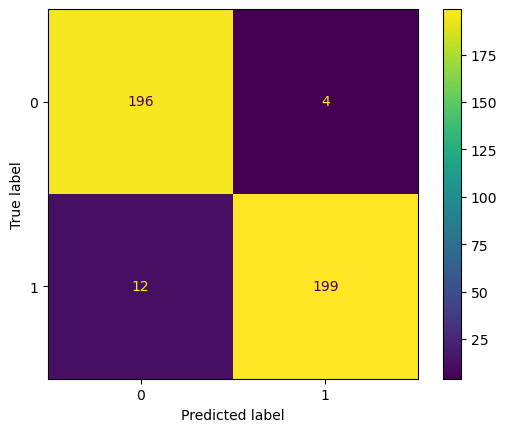

In [34]:
# Load the necessary module
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Investigate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
cm_display.plot()
plt.show()

Here, we see that number of false positive and false negative are relatively small. This also means our model is effective.

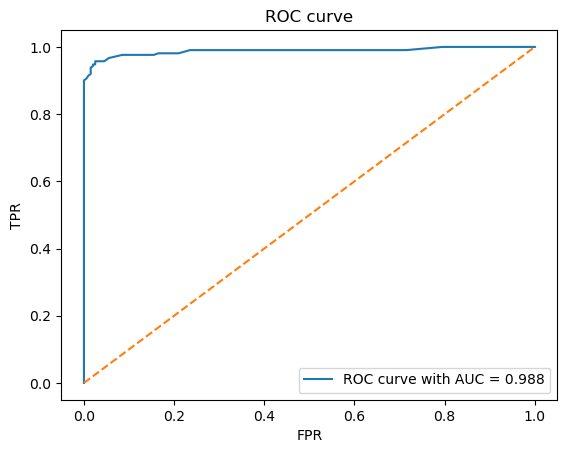

In [35]:
# Load the necessary package
from sklearn.metrics import roc_curve, auc

# ROC and AUC
y_pred_prob = pre_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label = f'ROC curve with AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc = 'lower right')
plt.show()

Since the AUC is very close to 1, we conclude that our classifer works very well.

# Final model construction

In [36]:
# Constructing final model using the variable selected above
final_predictors = pd.concat([all_predictors[x] for x in selected_predictors], axis=1)

final_model = RandomForestClassifier(bootstrap=True, random_state=123)

final_model.fit(final_predictors, response)

RandomForestClassifier(random_state=123)

In [37]:
# Output the file for kaggle submission with the final model
test_data = pd.read_csv('test.csv')

test_data['Contains_url'] = test_data['CONTENT'].apply(contains_url)

test_data['Contains_punc'] = test_data['CONTENT'].apply(contains_punc)

test_data['Contains_emo'] = test_data['CONTENT'].apply(contains_emoji)

test_data['Contains_words'] = test_data['CONTENT'].apply(contains_words)

test_tfidf_matrix = vectorizer.transform(test_data['CONTENT'])
test_tfidf_features = pd.DataFrame(test_tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

all_test_predictors = {
    'Content colume': test_tfidf_features,
    'Contains_url colume': test_data[['Contains_url']],
    'Contains_emo colume': test_data[['Contains_emo']],
    'Contains_punc colume': test_data[['Contains_punc']],
    'Contains_words colume': test_data[['Contains_words']]
}

final_test_predictors = pd.concat([all_test_predictors[x] for x in selected_predictors], axis = 1)

new_predictions = final_model.predict(final_test_predictors)

output = pd.DataFrame({
    'COMMENT_ID': test_data['COMMENT_ID'],
    'CLASS':new_predictions
})

output.to_csv('predictions_test_final.csv', index = False)

Using the variables selected above, we can see that the prediction accuracy using validation is about 94.059%, which is very good. 